<a href="https://colab.research.google.com/github/saritacruz10/Clustering-y-Reducci-n-de-Dimensionalidad/blob/main/semana3_Modelos_NoSupervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Parte 1: Preparación del entorno
#!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler9
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

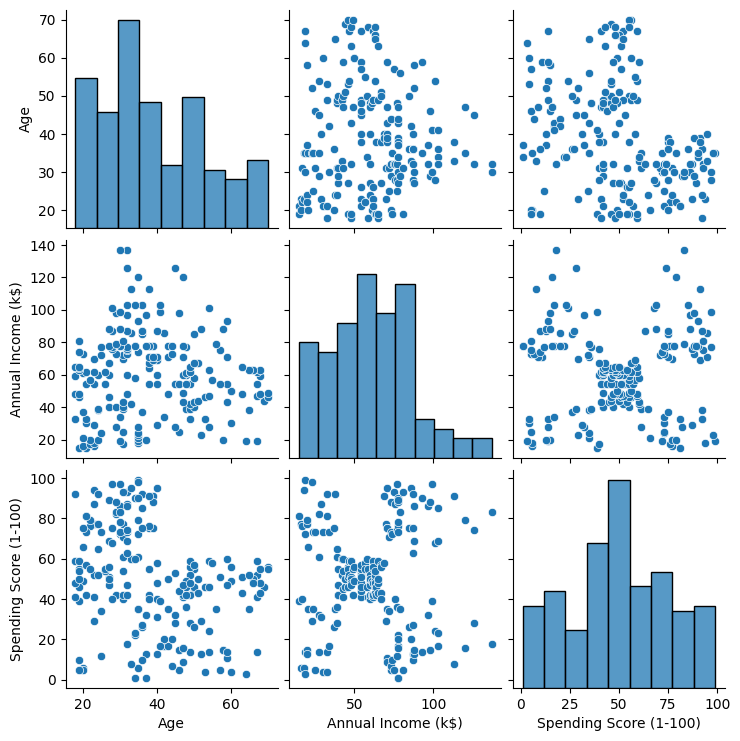

In [20]:
# Parte 2: Carga y análisis exploratorio de los datos
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head()
print(df.head())
print(df.info())
print(df.describe())

# Visualización de la distribución
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [21]:
# Parte 2.1: Validación y limpieza de datos (rúbrica)

# Verificación de valores nulos y duplicados
print("Nulos por columna:\n", df.isna().sum())
print("Registros duplicados:", df.duplicated().sum())

# Eliminación de columnas no relevantes para el clustering
# CustomerID es solo un identificador y no aporta información al modelo
df_model = df.drop(columns=['CustomerID'], errors='ignore')

df_model.head()


Nulos por columna:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Registros duplicados: 0


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
X = df_model[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


2.3 Escalado

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**¿Por qué es necesario escalar para K-Means y DBSCAN?**

Ambos algoritmos usan distancias (por ejemplo, distancia euclidiana) para agrupar los datos. Si una variable tiene un rango mucho mayor que otra, dominará la distancia total y, por lo tanto, tendrá más peso en la decisión del algoritmo, aunque no necesariamente sea más importante.

Ejemplo:
* Age: varía entre 18 y 70.

* Annual Income (k$): varía entre 15 y 137.

* Spending Score (1-100): varía entre 1 y 99.


Si no escalas, Annual Income influirá más en el cálculo de distancias simplemente porque sus valores son más grandes.

In [6]:
# Parte 3: Preprocesamiento
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**¿Qué es K-Means Clustering?**

Es un algoritmo no supervisado que divide los datos en K grupos (clusters) con base en la distancia entre puntos. Cada grupo se forma alrededor de un centroide. El objetivo es minimizar la distancia total entre los puntos y su centroide.

KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64
KMeans_Cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64


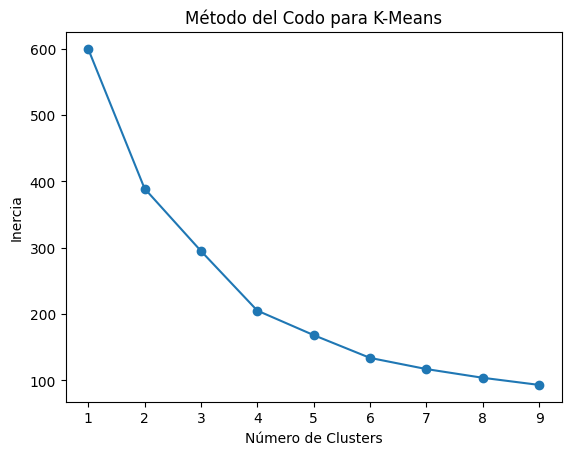

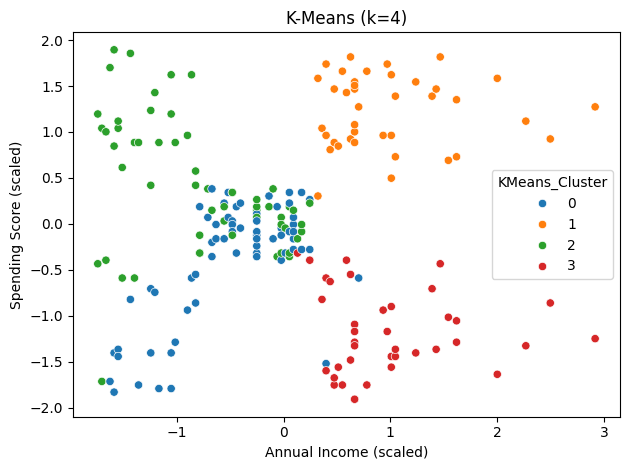

In [30]:
# Parte 4.1: Clustering con K-Means
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    # Evidencia: conteo de elementos por cluster
    print(df['KMeans_Cluster'].value_counts().sort_index())

# Método del Codo
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters') # Numero de grupos
plt.ylabel('Inercia') # la suma de las distancias cuadradas de cada punto a su centroide (cuánto error hay dentro de cada cluster).
plt.title('Método del Codo para K-Means')
plt.show()

# Ajuste del modelo con K óptimo (ej. 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['KMeans_Cluster'], palette='tab10')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means (k=4)')
plt.tight_layout()
plt.show()


In [ ]:
# Parte 4.1.1: Interpretación de Clustering con K-Means
df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


¿Qué es DBSCAN?

DBSCAN es un algoritmo de clustering basado en densidad. A diferencia de K-Means (que requiere que definas el número de clusters k), DBSCAN:

* Encuentra agrupaciones densas de puntos sin necesidad de saber cuántos clusters hay.

* Identifica automáticamente "ruido" o "outliers", etiquetándolos como -1.

DBSCAN_Cluster
-1     28
 0    137
 1     35
Name: count, dtype: int64


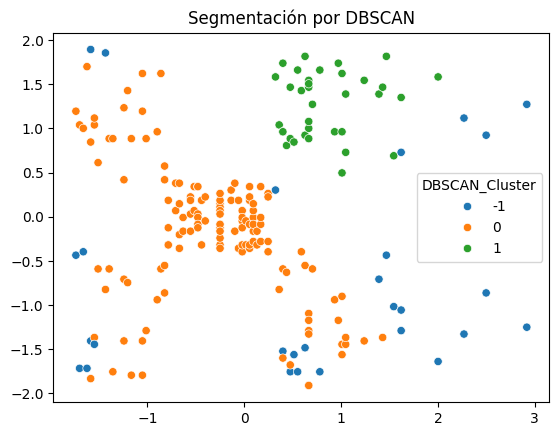

In [27]:
# Parte 4.2: Clustering con DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5) # eps = radio máximo para considerar que dos puntos están “cerca”./ min_samples =  número mínimo de puntos vecinos necesarios para formar un cluster.
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
# Evidencia: conteo de elementos por cluster (incluye -1 si hay ruido)
print(df['DBSCAN_Cluster'].value_counts().sort_index())

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('Segmentación por DBSCAN')
plt.show()


In [28]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN
df['DBSCAN_Cluster'].value_counts()
df.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print(df['DBSCAN_Cluster'].value_counts().sort_index())
display(df.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())




DBSCAN_Cluster
-1     28
 0    137
 1     35
Name: count, dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,,
-1,36.107143,76.857143,33.250000
0,40.970803,51.613139,45.335766
1,32.742857,82.542857,82.800000


In [12]:
# Parte 4.2.1: Interpretando los Clustering con DBSCAN sin atípicos
df_no_noise = df[df['DBSCAN_Cluster'] != -1]
df_no_noise.groupby('DBSCAN_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,,
0,40.970803,51.613139,45.335766
1,32.742857,82.542857,82.800000


**¿Qué es PCA?**

PCA (Principal Component Analysis) es una técnica matemática que:

* Reduce el número de variables (dimensiones) de un dataset.

* Conserva la mayor parte de la variabilidad (información) de los datos originales.

* Transforma los datos a componentes principales que son combinaciones lineales de las variables originales.

¿Qué significa reducir de 3 a 2 dimensiones?

Reduces de:

Tres variables originales (Edad, Ingreso, Gasto)

a:

Dos nuevas variables artificiales, llamadas Componentes principales: PC1 y PC2.

Cada una de estas componentes es una combinación lineal de las variables originales. Por ejemplo:



* PC1=0.5⋅Edad+0.7⋅Ingreso+0.5⋅Gasto


* PC2=−0.6⋅Edad+0.4⋅Ingreso+0.7⋅Gasto

Varianza explicada: [0.44266167 0.33308378]
Varianza total: 0.7757454566976747


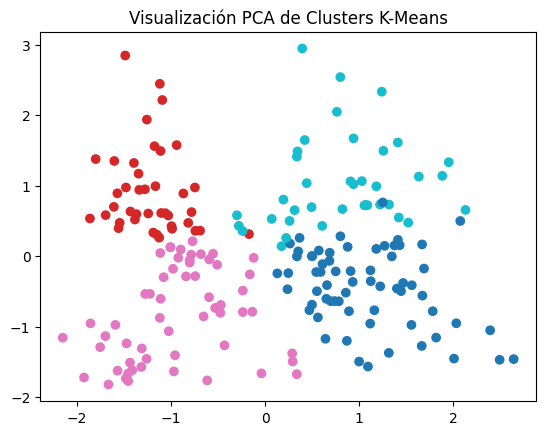

In [29]:
# Parte 5.1: Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Varianza explicada:", pca.explained_variance_ratio_)
print("Varianza total:", pca.explained_variance_ratio_.sum())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters K-Means')
plt.show()


In [14]:
# Parte 5.1.1: Interpretación de Reducción de dimensionalidad con PCA
df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [15]:
# Parte 5.1.2: Interpretación detallada de Reducción de dimensionalidad con PCA
# Mostrar algunos clientes por cluster
for i in range(4):
    print(f"\nCluster {i}")
    display(df[df['KMeans_Cluster'] == i][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].head())



Cluster 0


,Age,Annual Income (k$),Spending Score (1-100)
6,35,18,6
8,64,19,3
10,67,19,14
12,58,20,15
14,37,20,13



Cluster 1


,Age,Annual Income (k$),Spending Score (1-100)
122,40,69,58
123,39,69,91
125,31,70,77
127,40,71,95
129,38,71,75



Cluster 2


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40



Cluster 3


,Age,Annual Income (k$),Spending Score (1-100)
112,38,64,42
121,38,67,40
124,23,70,29
126,43,71,35
130,47,71,9


**¿Qué es t-SNE?**

t-SNE es una técnica de reducción de dimensionalidad no lineal diseñada específicamente para visualización de datos complejos en 2D o 3D.

A diferencia de PCA (que usa combinaciones lineales de variables para preservar la varianza), t-SNE preserva la estructura local de los datos. Es decir:

Los puntos que estaban cerca en el espacio original seguirán cerca en el nuevo espacio 2D.


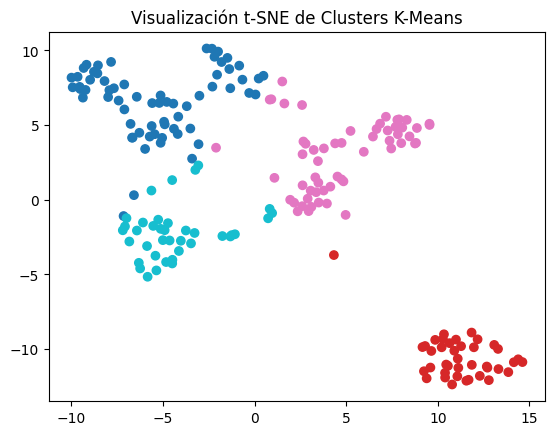

In [16]:
# Parte 5.2: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42) # cuántos vecinos cercanos considera t-SNE / cuánto se mueven los puntos
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.show()


In [ ]:
# Parte 5.2.1: Interpretación de Reducción de dimensionalidad con t-SNE
df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [17]:
# Parte 6: Análisis
print("Clusters únicos KMeans:", df['KMeans_Cluster'].unique())
print("Clusters únicos DBSCAN:", df['DBSCAN_Cluster'].unique())


Clusters únicos KMeans: [2 0 3 1]
Clusters únicos DBSCAN: [-1  0  1]


6. Reducción de dimensionalidad para interpretar mejor (PCA y t-SNE)
6.1 PCA a 2D (para visualizar clusters)

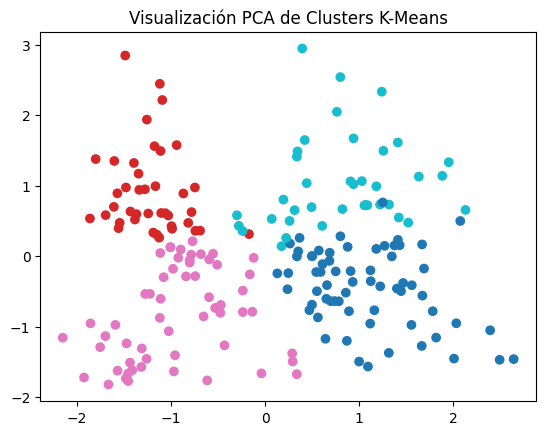

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización PCA de Clusters K-Means')
plt.show()


6.2 t-SNE a 2D (visualización más “separada”)

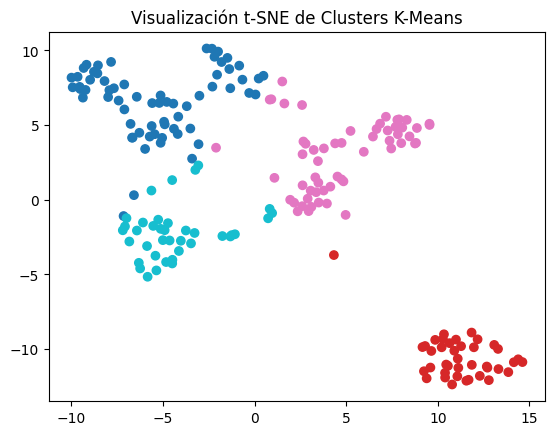

In [19]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['KMeans_Cluster'], cmap='tab10')
plt.title('Visualización t-SNE de Clusters K-Means')
plt.show()


1) ¿Cuántos clusters parecen ser óptimos según K-means? (según el “codo”)

Con tu dataset, al calcular la inercia para k=2,3,4,5,6 se observa una caída fuerte hasta k = 4 y luego la mejora se vuelve más gradual:

Inercia aprox.:
k=2: 389.39
k=3: 295.21
k=4: 205.23 ← aquí se nota el “codo”
k=5: 168.25
k=6: 133.87

Conclusión: por el método del codo, el número más justificable es k = 4. La métrica de silhouette en tu caso sigue subiendo hasta 6, pero la consigna pide “codo”, y el “codo” más claro está en 4.

2) ¿Cómo se comparan los resultados entre K-means y DBSCAN?

K-means (k=4):

  Obliga a formar 4 grupos (no existe “ruido”).

  Es útil cuando quieres segmentar siempre a todos los clientes.

DBSCAN (eps=0.6, min_samples=5) en tu dataset: Detectó 2 clusters y ruido (-1):

  Cluster 0: 137 clientes

  Cluster 1: 35 clientes

  Ruido (-1): 28 clientes (considerados “atípicos” o fuera de densidad)

Cmparación clave: K-means divide mejor en varios segmentos interpretables (4 perfiles).
DBSCAN es más “estricto”: agrupa por densidad, por eso fusiona muchos clientes en un cluster grande y deja 28 como ruido (outliers o casos menos comunes).

3) ¿Qué aporta PCA / t-SNE a la interpretación de los clusters?

PCA (2 componentes) en tu dataset:

  Los 2 primeros componentes explican ~77.6% de la variabilidad total (≈ 44.3% + 33.3%).
  Permite visualizar si los clusters realmente están separados o se superponen.

t-SNE
  No “explica varianza” como PCA, pero suele separar visualmente mejor los grupos cuando hay patrones no lineales.

  Es excelente para “ver” la segmentación, aunque no es ideal para interpretar matemáticamente qué significa cada eje.

Conclusión PCA/t-SNE sirven para validar visualmente la segmentación y facilitar la interpretación (si los clusters se ven compactos y separados).

4) ¿Qué perfiles de usuarios/consumidores detectaste? (edad/ingreso/gasto)
Usando K-means con k=4, los perfiles (promedios) quedan así:

Cluster 0 (65 clientes)
  Edad: ~54 años
  Ingreso: ~47.7k
  Gasto: ~40
    Perfil: clientes mayores, ingreso medio/bajo, gasto medio-bajo → compras más cuidadosas/estables.

Cluster 2 (57 clientes)
  Edad: ~25.4 años
  Ingreso: ~40k
  Gasto: ~60.3
    Perfil: clientes jóvenes, ingreso bajo/medio, gasto medio-alto → tienden a gastar más pese a ingresos moderados (posible consumo por impulso o promociones).

Cluster 1 (40 clientes)
  Edad: ~32.9 años
  Ingreso: ~86.1k
  Gasto: ~81.5
    Perfil: ingreso alto y gasto alto → clientes premium / objetivo principal (alto valor).

Cluster 3 (38 clientes)
  Edad: ~39.4 años
  Ingreso: ~86.5k
  Gasto: ~19.6
    Perfil: ingreso alto pero gasto bajo → clientes con poder adquisitivo pero conservadores o poco interesados (o requieren estrategias específicas para activar compras).